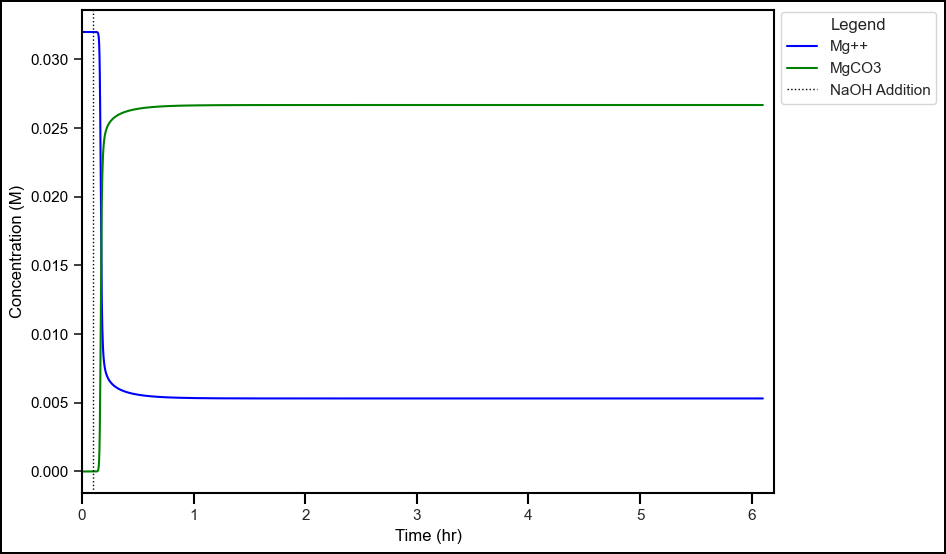

In [1]:
# This code will create Figure 4a, which shows the behavior of the precipitation reaction 

# import necessary libraries 
import matplotlib.pyplot as plt
import re 
import pandas as pd
import seaborn as sns 

# import the csv file containing the data 
data = pd.read_csv("CSV Data Files/100mM NaOH Treatment + Air Bubbling at 25°C.csv", float_precision="round_trip")

time = data['Time(hrs)']
mg_concentration = data['Mg++']


# Get the Magnesite Concentration 
Magnesite_Concentration = [0] 

for i in range(0, len(time)-1):
    MgCO3 = (mg_concentration[i] - mg_concentration[i+1]) + Magnesite_Concentration[i]
    Magnesite_Concentration.append(MgCO3)

# Graph the Mg++, MgCO3

# Set Seaborn style
sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Set the background color of the plot area to white
ax1.set_facecolor("white")

# Plot Mg++ and MgCO₃ concentrations on the first y-axis
line1, = ax1.plot(time, mg_concentration, color="blue", label="Mg++")
line2, = ax1.plot(time, Magnesite_Concentration, color="green", label="MgCO3")

# Customize first y-axis
ax1.set_xlabel("Time (hr)", color="black")
ax1.set_ylabel("Concentration (M)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.tick_params(axis="x", direction="out", length=8, color="black", width = 1.5)
ax1.set_xlim(0, 6.2)


# Adjust spines to create a black border
for spine in ax1.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(1.5)


# Set all spines for ax1 to black
ax1.spines["left"].set_edgecolor("black")
ax1.spines["top"].set_edgecolor("black")

# Adjust their linewidth as needed
ax1.spines["left"].set_linewidth(1.5)
ax1.spines["top"].set_linewidth(1.5)

ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_edgecolor("black")  # Set to black for consistency
ax1.spines["bottom"].set_linewidth(1.5)


# Add a black border around the entire figure
fig.patch.set_edgecolor("black")
fig.patch.set_linewidth(1.5)

# Ensure tick marks are drawn above the grid
ax1.tick_params(axis="y", zorder=2)
ax1.tick_params(axis="x", zorder=2)

# Create the vertical line and store its handle
vertical_line2 = plt.axvline(x=0.1, ymin=0, ymax=1, color='black', linestyle=':', linewidth=1, label='NaOH Addition')

# Combine legends
lines = [line1, line2, vertical_line2]  # Add the vertical line to the list
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc="upper right", bbox_to_anchor=(1.19, 0.93), title="Legend", facecolor="white")


# Fix layout to ensure the figure border is not cropped
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave extra space for elements

# Show plot
plt.show()

# Save file as SVG and PNG 
fig.savefig("Figure SVG/Figure 4A_100mM NaOH + Air Bubbling at 25°C.svg", bbox_inches="tight", edgecolor="black", format="svg")
fig.savefig("Figure Images/Figure 4A_100mM NaOH + Air Bubbling at 25°C.png", dpi = 300, bbox_inches="tight", edgecolor="black", format="png")

# export data used as a CSV Data File 
export = {'Time (hrs)': time, 'Mg++': mg_concentration, 'Magnesite': Magnesite_Concentration}
export = pd.DataFrame(export)

export.to_csv('CSV Data Files/Figure 4A.csv', index=False) 


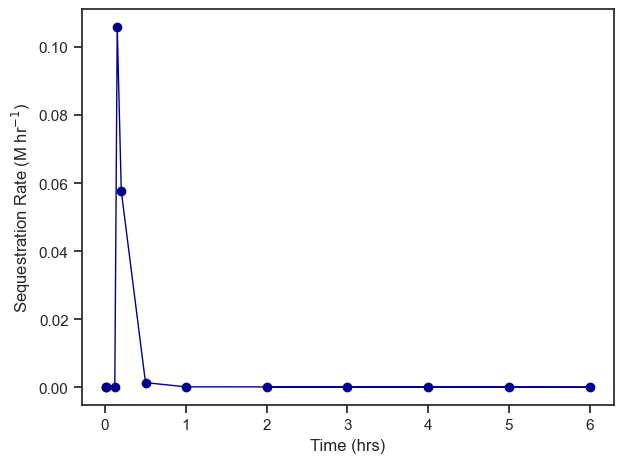

In [2]:
# This code will create Figure 4b, which will show the CO2 sequestration rate over time 

import numpy as np 
# Calculate the CO2 Sequestration Rate at t = 0.01 hr 
# Find the closest value GREATER than 0.01 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 0.01]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 0.01)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 0.01 ({closest_time} hrs): {Mg_final}")

    # print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T1 = closest_time
R1 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R1)

# Calculate the CO2 Sequestration Rate at t = 0.1 hr

# print("\n")


Mg_final = data.loc[data["Time(hrs)"] == 0.1, "Mg++"].values[0]
# print(Mg_final)


row_index = data.index[data['Time(hrs)'] == 0.1].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T2 = closest_time
R2 = (Mg_initial - Mg_final)/(0.1 - t_initial)

# print(R2)

# Calculate the CO2 Sequestration Rate at 5 = 0.12 hr

# print("\n")

# Find the closest value GREATER than 0.12 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 0.12]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 0.12)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
#     print(f"Mg++ value at the closest Time > 0.12 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T3 = closest_time
R3 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R3)


# Calculate the CO2 Sequestration Rate at t = 0.15 hr 


# print("\n")

# Find the closest value GREATER than 0.15 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 0.15]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 0.15)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 0.15 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T4 = closest_time
R4 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R4)

# Calculate the CO2 Sequestration Rate at t = 0.2 hr

print("\n")

# Find the closest value GREATER than 0.2 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 0.2]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 0.2)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
#     print(f"Mg++ value at the closest Time > 0.2 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)
# print(repr(Mg_initial))  # Displays full precision of the number
# print(f"Mg_initial: {Mg_initial:.17f}")



t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T45 = closest_time
R45 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R45)


# Calculate the CO2 Sequestration Rate at t = 0.5 hr

# print("\n")

# Find the closest value GREATER than 0.5 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 0.5]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 0.5)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
#     print(f"Mg++ value at the closest Time > 0.5 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)


T5 = closest_time
R5 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R5)

# Calculate the CO2 Sequestration Rate at t = 1 hr

# print("\n")

# Find the closest value GREATER than 1 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 1.0]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 1.0)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 1.0 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T6 = closest_time
R6 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R6)

# Calculate the CO2 Sequestration Rate at t = 6 hr 

# print("\n")

# Find the closest value GREATER than 6 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 6.0]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 6.0)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 6.0 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T7 = closest_time
R7 = (Mg_initial - Mg_final)/(closest_time - t_initial)
# print(closest_time)

# print(R7)


# Calculate the sequestration rate at t = 2 hr 
# Find the closest value GREATER than 2 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 2.0]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 2.0)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 2.0 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T8 = closest_time
R8 = (Mg_initial - Mg_final)/(closest_time - t_initial)


# Calculate the sequestration rate at t = 3 hr 
# Find the closest value GREATER than 3 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 3.0]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 3.0)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 3.0 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T9 = closest_time
R9 = (Mg_initial - Mg_final)/(closest_time - t_initial)

# Calculate the sequestration rate at t = 4 hr 
# Find the closest value GREATER than 4 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 4.0]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 4.0)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 4.0 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T10 = closest_time
R10 = (Mg_initial - Mg_final)/(closest_time - t_initial)

# Calculate the sequestration rate at t = 5 hr 
# Find the closest value GREATER than 5 using np.isclose()
greater_times = data["Time(hrs)"][data["Time(hrs)"] > 5.0]
if not greater_times.empty:
    closest_time = greater_times.iloc[(np.abs(greater_times - 5.0)).argmin()]
    Mg_final = data.loc[data["Time(hrs)"] == closest_time, "Mg++"].values[0]
    # print(f"Mg++ value at the closest Time > 5.0 ({closest_time} hrs): {Mg_final}")


# print(Mg_final)

row_index = data.index[data['Time(hrs)'] == closest_time].tolist()
row_index = row_index[0]
# print(row_index)

row_index = int(row_index)

row_before = row_index - 1

Mg_initial = data.loc[row_before, "Mg++"]
# print(Mg_initial)

t_initial = data.loc[row_before, "Time(hrs)"]
# print(t_initial)

T11 = closest_time
R11 = (Mg_initial - Mg_final)/(closest_time - t_initial)

# Graph the CO2 Sequestration Rate over time 

# Set Seaborn style
sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

time = [T1, T2, T3, T4, T45, T5, T6, T7, T8, T9, T10, T11]
Sequestration_Rate = [R1, R2, R3, R4, R45, R5, R6, R7, R8, R9, R10, R11]

plt.scatter(time, Sequestration_Rate, color='darkblue')  # Scatter plot
plt.plot(time, Sequestration_Rate, color='darkblue', linestyle='-', linewidth = 1)  # Line connecting points

plt.xlabel("Time (hrs)")
plt.ylabel("Sequestration Rate (M hr$^{-1}$)")

# Show the plots side by side
plt.tight_layout()

# Save file as SVG and PNG 
plt.savefig("Figure SVG/Figure 4B_100mM NaOH + Air Bubbling at 25°C.svg", bbox_inches="tight", edgecolor="black", format="svg")
plt.savefig("Figure Images/Figure 4B_100mM NaOH + Air Bubbling at 25°C.png", bbox_inches="tight", edgecolor="black", format="png")

plt.show()

# export data used as a CSV Data File 
export = {'Time (hrs)': time, 'Sequestration Rate': Sequestration_Rate}
export = pd.DataFrame(export)

export.to_csv('CSV Data Files/Figure 4B.csv', index=False) 

